In [1]:
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()


/home/pablo/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  
/home/pablo/.conda/envs/torch/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv("../corpus/B2W-Reviews01.csv", sep=";")
print(df.shape)

(132373, 14)


/home/pablo/.conda/envs/torch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.drop(["submission_date", "recommend_to_a_friend"], axis=1)
df["reviewer_birth_year"] = df["reviewer_birth_year"].fillna(value= 1900)

In [4]:
df["site_category_lv1"].value_counts(dropna=False).plot(kind="bar", figsize=(10,10))

4136 valores dropados


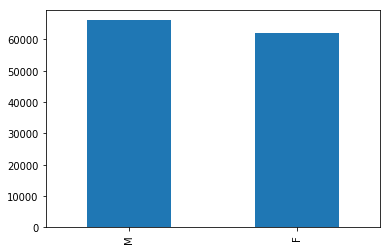

In [5]:

orig = df.shape[0]
df = df.dropna(subset=["reviewer_gender"])
print(orig - df.shape[0], "valores dropados")
df["reviewer_gender"].value_counts(dropna=False).plot(kind="bar")

In [6]:
df['reviewer_birth_year'].value_counts(dropna=False)

1981.0    4347
1982.0    4346
1983.0    4213
1984.0    4206
1980.0    4126
          ... 
1914.0       1
1915.0       1
1916.0       1
1917.0       1
1926.0       1
Name: reviewer_birth_year, Length: 115, dtype: int64

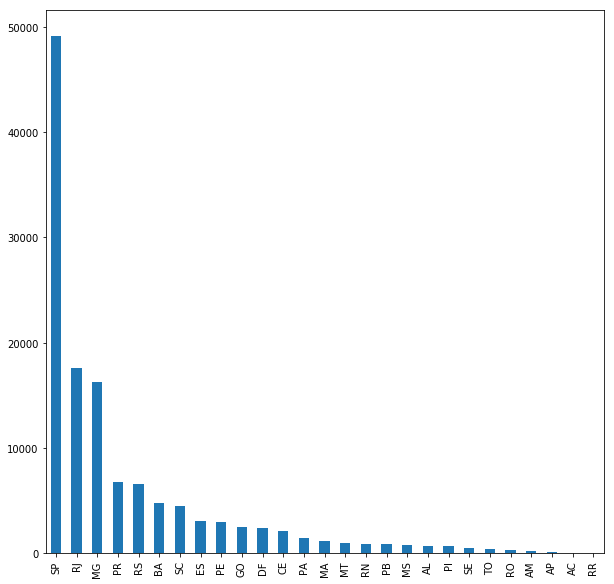

In [7]:
df["reviewer_state"].value_counts(dropna=False).plot(kind="bar", figsize=(10,10))

In [8]:
counts = df['reviewer_birth_year'].value_counts()

res = df[df['reviewer_birth_year'].isin(counts[counts < 40].index)]
orig = df.shape[0]
df = df.drop(res['reviewer_birth_year'].dropna().index)

print(orig - df.shape[0], "Valores removidos")

317 Valores removidos


In [9]:
counts = df['reviewer_state'].value_counts()

res = df[df['reviewer_state'].isin(counts[counts < 1000].index)]
orig = df.shape[0]
df = df.drop(res['reviewer_state'].dropna().index)

print(orig - df.shape[0], "Valores removidos")

6779 Valores removidos


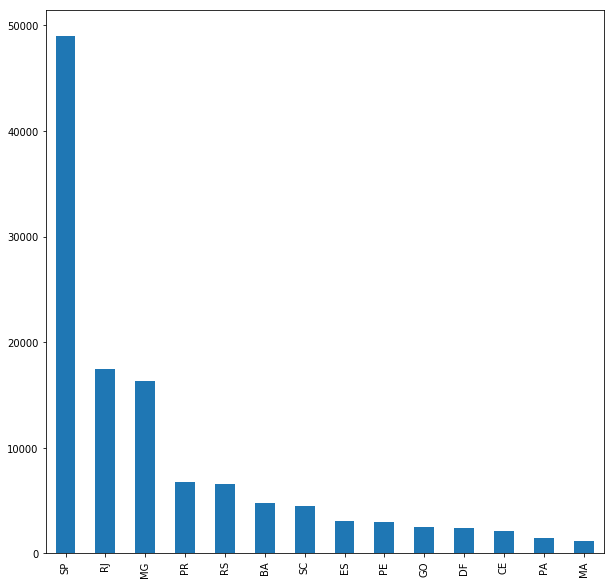

In [10]:
df["reviewer_state"].value_counts(dropna=False).plot(kind="bar", figsize=(10,10))

In [11]:
df = df.drop(["reviewer_id", "product_id", "product_name", "product_brand", "site_category_lv1", 
         "site_category_lv2", "overall_rating"], axis=1)

In [12]:
import string
import spacy
import re

nlp = spacy.load("pt_core_news_sm")

punctuations = string.punctuation



def tokenize(text, logging=False):
    tokens = [tok.lemma_.lower().strip() for tok in nlp(text)]
    
    return " ".join(tokens)

In [13]:
df["review_text"] = df["review_text"].progress_apply(lambda x : tokenize(x))
df["review_title"] = df["review_title"].progress_apply(lambda x : tokenize(x))

In [14]:
#removemos sentencas a serem geradsa maiores que 10
#removemos sentencas a serem analisadas maiores que 30
df.shape
df = df[df['review_text'].str.split(" ").str.len().lt(30)]
df = df[df['review_title'].str.split(" ").str.len().lt(10)]
df.shape


(84519, 5)

In [15]:
df["size"] = df["review_text"].apply(lambda x : filter_string(x))
df["size"].describe()

NameError: name 'filter_string' is not defined

In [16]:
def clean_text(text, logging=False):
    """ 
        TEMOS QUE REMOVER A PONTUACAO, PRONOMES E SIMBOLOS DE REAIS.
        SUBSTITUIR NÚMEROS PRLO TOKEN <NUM> 
        
    """
    
    #tokens = [tok.lemma_.lower().strip() for tok in nlp(text) if not(tok.is_stop)]
    tokens = text.split(" ")
    tokens = [tok for tok in tokens if tok not in punctuations]
    tokens = [re.sub('\r$', '', tok) for tok in tokens]
    tokens = ' '.join(tokens)
    toks   = []
    for tok in nlp(tokens):
        if tok.pos_ == 'NUM':
            toks.append("<num>".lower().strip())
        else:
            toks.append(tok.lemma_.lower().strip())
            
        
    #tokens = [tok.pos_ for tok in nlp(tokens) if tok.pos_ == 'NUM' else str(tok)]

    return " ".join(toks)

df["review_text"] = df["review_text"].progress_apply(lambda x : clean_text(x))
df["review_title"] = df["review_title"].progress_apply(lambda x : clean_text(x))

In [17]:
df["reviewer_birth_year"] = 2020 - df["reviewer_birth_year"]
df = df[df["reviewer_birth_year"] != 120.0] # é um oulier
df["reviewer_birth_year"].describe()

count    83226.000000
mean        42.757516
std         12.659801
min         18.000000
25%         33.000000
50%         41.000000
75%         51.000000
max         84.000000
Name: reviewer_birth_year, dtype: float64

In [18]:
df = df.dropna(subset=["review_text"])
df.shape

(83226, 5)

In [19]:
df.to_csv("post_processed.csv", sep="\t", index=False)

In [24]:
text_complex = open("./complex.txt", "w+")
for ele in df["review_text"].tolist():
    if len(ele.split(" ")) <= 30:
        for word in ele.split(" "):
            text_complex.write(word+" ")
        text_complex.write("\n\n")


text_complex.close()


In [25]:
text_complex = open("./title.txt", "w+")
for ele in df["review_title"].tolist():
    if len(ele.split(" ")) <= 30:
        for word in ele.split(" "):
            text_complex.write(word+" ")
        text_complex.write("\n\n")


text_complex.close()




In [36]:
df = pd.read_csv("post_processed.csv", sep="\t")

In [37]:
df["reviewer_birth_year"] = 2019 - df["reviewer_birth_year"]

In [38]:
df = df[df["reviewer_birth_year"] != 119.0] # é um oulier

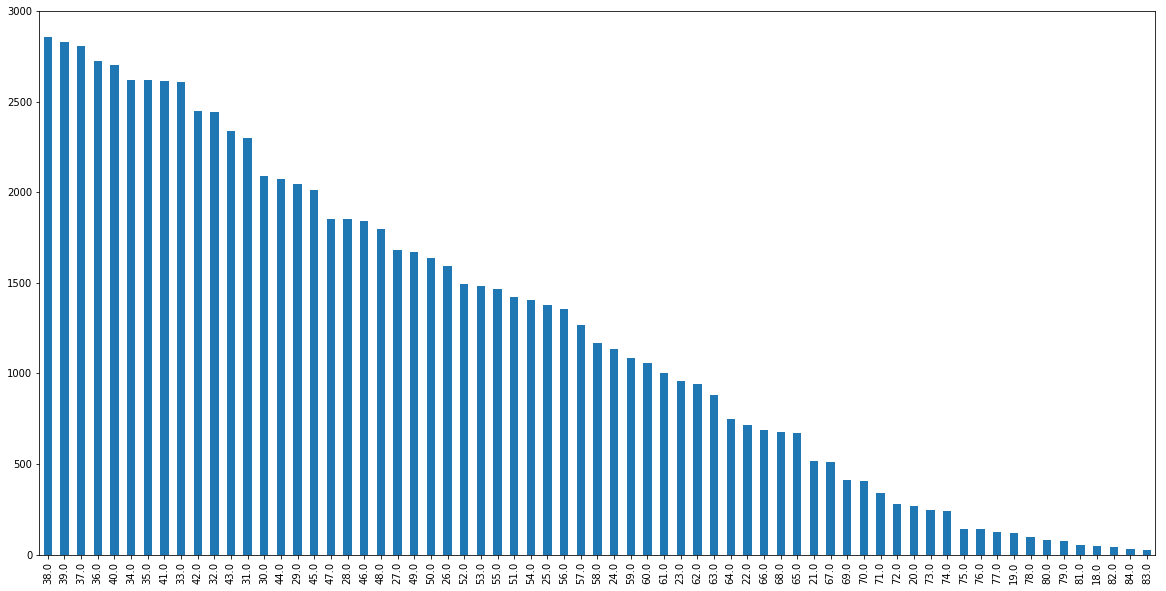

In [39]:
df["reviewer_birth_year"].value_counts().plot(kind="bar", figsize=(20,10))

In [40]:
df.shape

(83226, 6)

In [41]:
df.to_csv("post_processed.csv", sep="\t")

In [54]:
df = pd.read_csv("post_processed.csv", sep="\t")
df['age'] = pd.cut(x=df['reviewer_birth_year'], bins=5)
df.shape

(83226, 8)

In [55]:
df['age']

0          (57.6, 70.8]
1        (17.934, 31.2]
2          (31.2, 44.4]
3          (31.2, 44.4]
4          (31.2, 44.4]
              ...      
83221      (31.2, 44.4]
83222      (31.2, 44.4]
83223      (31.2, 44.4]
83224    (17.934, 31.2]
83225      (31.2, 44.4]
Name: age, Length: 83226, dtype: category
Categories (5, interval[float64]): [(17.934, 31.2] < (31.2, 44.4] < (44.4, 57.6] < (57.6, 70.8] < (70.8, 84.0]]

In [56]:
#df = df[pd.notnull(df['Gender'])]

df = df.dropna(subset=["age"], axis=0)

df = df.dropna(subset=["review_title"], axis=0)

In [58]:
df['age'].value_counts()

(31.2, 44.4]      33656
(44.4, 57.6]      20682
(17.934, 31.2]    16667
(57.6, 70.8]      10221
(70.8, 84.0]       1916
Name: age, dtype: int64

In [64]:
df.shape
df["estado"] = df["reviewer_state"]
df["genero"] = df["reviewer_gender"]
df["x"] = df["review_text"]
df["y"] = df["review_title"]


In [65]:
df.to_csv("post_processed.csv", sep="\t")

In [63]:
df

,Unnamed: 0,Unnamed: 0.1,review_title,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,age
0,0,0,bom,estar contentar com o comprar entregar rápido ...,62.0,F,RJ,"(57.6, 70.8]"
1,1,1,preço imbatível ótima qualidade,por apenas r$ <num> conseguir comprar esse lin...,24.0,M,SC,"(17.934, 31.2]"
2,2,2,presentar mais que desejar,meu filhar amar parecer de verdade com tanto d...,35.0,F,SP,"(31.2, 44.4]"
3,3,3,gostar bastante do produto,produto excelente qualidade bom câmera desenvo...,33.0,M,GO,"(31.2, 44.4]"
4,4,4,gostar do produto,o barulhar e minimo e o ventar ser bem forte o...,33.0,M,SP,"(31.2, 44.4]"
...,...,...,...,...,...,...,...,...
83221,83221,83221,ótimo produto,valer muito estar usar o controlar do xbox e m...,32.0,M,RS,"(31.2, 44.4]"
83222,83222,83222,sensacional,prático e baratar super indicar o produto pari...,41.0,F,SP,"(31.2, 44.4]"
83223,83223,83223,ótimo produto,chegar antar do prazo prever e corresponder o ...,41.0,F,PR,"(31.2, 44.4]"
83224,83224,83224,o produto não ser bom,material fraco poder ser melhor ficar dever o ...,29.0,M,RJ,"(17.934, 31.2]"


In [ ]:
df = pd.read_csv("post_processed.csv", sep="\t")
text_complex = open("./complex.txt", "w+")
for ele in df["review_text"].tolist():
    for word in ele.split(" "):
        text_complex.write(word+" ")
    text_complex.write("\n\n")


text_complex.close()



In [ ]:
text_complex = open("./title.txt", "w+")
for ele in df["review_title"].tolist():
    for word in ele.split(" "):
        text_complex.write(word+" ")
    text_complex.write("\n\n")


text_complex.close()